# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [1]:
options(repr.plot.width=4, repr.plot.height=4)

# manipulating data with R

R is a language tought from the statistical standpoint. It is at first a little counter intuitive for people used to matlab like programming. Matlab and the likes, scilab, octave, python, are build from the linear algebra standpoint.

Thus R is optimal for statistical data manipulation since it provide a large number of built-in functions. However most of these functions are ignored because they have no equivalent in matlab. 

In this section, I will list some very important functions that are usually discovered too late... and that can greatly simplify the code and more importantly make it more readeable.

First load some data to play with.

In [3]:
load(url('https://github.com/jwist/chemometrics/raw/master/datasets/coffeeMulti.rda'))

In [4]:
# use ls to list the variables and discover that whas saved into this file
ls()

[1] "coffeeMulti"

In [6]:
# use the following command to explore the variable.
names(coffeeMulti)

[1] "nmrBin"   "nmrParam" "irms"     "gc"

In [10]:
# use head to visualize the data
head( coffeeMulti$irms )

,code,country,department,caffeine1,caffeine2,mean
5,1172,Colombia,Tolima,-28.285,-27.936,-28.111
6,1173,Colombia,Tolima,-28.931,-28.800,-28.866
7,1198,Brasil,Otro,-28.056,-28.274,-28.165
8,1199,Colombia,Huila,-28.154,-28.022,-28.088
10,1201,Colombia,Huila,-28.198,-28.372,-28.285
11,1204,Brasil,Otro,-27.949,-27.978,-27.964


Let's play with the Isotope Ratio Mass Spectrometry (IRMS) data

In [13]:
d <- coffeeMulti$irms
is(d)

[1] "AsIs"     "oldClass"

Let's compute the mean colomn from the two columns "caffeine1" and "caffeine2". This is done easily using the apply function to manipulate arrays. The first argument is the array, in this case the two columns, the second argument is the "MARGIN", 1 for rows and 2 for columns, and the last arguments is the function to be applied. The MARGIN tells how to apply the mean function. 

In [24]:
m <- apply(d[,c('caffeine1','caffeine2')], 1, mean)
head( data.frame(mean = m) )

,mean
5,-28.1105
6,-28.8655
7,-28.1650
8,-28.0880
10,-28.2850
11,-27.9635


to make it clear we can use ```MARGIN = 2```

In [28]:
m <- apply(d[,c('caffeine1','caffeine2')], 2, mean)
head( data.frame('mean by columns' = m) )

,mean.by.columns
caffeine1,-29.00174
caffeine2,-28.98335


Instead of mean any function can be used, like max, min, quantile, etc.

In [27]:
m <- apply(d[,c('caffeine1','caffeine2')], 2, quantile)
head( data.frame(quantile = m) )

,quantile.caffeine1,quantile.caffeine2
0%,-30.87700,-30.90900
25%,-29.52950,-29.73650
50%,-28.88300,-28.80000
75%,-28.39175,-28.37375
100%,-27.72200,-27.73500


The message is that the loop should be avoided as much as possible in R and that there are many build-in function for that purpose.

Another useful example is centering the data. Say you want to find the mean of a column and then substract this value to all the elements of that column. This way you will have centered your data. At first glance, this look fairly complex and implies several operations. R provide a simple framework for this, called ``` sweep()```

In [61]:
head( sweep( d[c('caffeine1', 'caffeine2')], 2, apply(d[c('caffeine1', 'caffeine2')], 2, mean), "-" ) )

,caffeine1,caffeine2
5,0.71673529,1.0473529
6,0.07073529,0.1833529
7,0.94573529,0.7093529
8,0.84773529,0.9613529
10,0.80373529,0.6113529
11,1.05273529,1.0053529


In [67]:
head( apply(d[c('caffeine1', 'caffeine2')], 2, function(x) x - mean(x)) )

,caffeine1,caffeine2
5,0.71673529,1.0473529
6,0.07073529,0.1833529
7,0.94573529,0.7093529
8,0.84773529,0.9613529
10,0.80373529,0.6113529
11,1.05273529,1.0053529


This second example is my favourite and shows how apply works. Instead of using a predifined function such as ```mean()``` we use a user defined function. In this case it is clear that x selects the column and the function performes: the column minus its means.

Althought ```sweep()``` achieves the same results, the second example is much more general.

Another very useful example is the data aggregation. For example you want to find the mean value of your variable by country. In this case the isotope ratio mean by country. Again, if looked at from the matlab standpoint, this is not straighforward. However R provide a very handy solution. The first aggregation function you should know is ```table()```. Look how this works:

In [71]:
table( d$country )


  Brasil Colombia     Peru 
      11       15        8 

So, we know how many samples we have from each country. But now we want to compute the mean.

In [84]:
aggregate(d[c('caffeine1', 'caffeine2')], by = list(unlist(d['country'], use.names = FALSE)), mean)

Group.1,caffeine1,caffeine2
Brasil,-29.13264,-29.12582
Colombia,-28.51793,-28.48793
Peru,-29.72888,-29.71637


The ```by=``` argument must be a list object. Because our data are not perfectly stored, we have to first unlist our country column and create a new clean list. The ```unlist()``` function is very usefull to unformat any vector of data before reassigning it with a new type.

In [248]:
by(d['mean'], d['country'], function(x) max(x))

country: Brasil
[1] -27.964
------------------------------------------------------------ 
country: Colombia
[1] -27.729
------------------------------------------------------------ 
country: Peru
[1] -28.567

Another way to obtain the same results.

In [249]:
by(d, d$country, function(x) max(x$mean))

d$country: Brasil
[1] -27.964
------------------------------------------------------------ 
d$country: Colombia
[1] -27.729
------------------------------------------------------------ 
d$country: Peru
[1] -28.567

For more control over the data, aggregation can be performed without applying any function. Functions can be applied later.

In [250]:
a <- aggregate(d[c('caffeine1', 'caffeine2')], list(d$country), function(x) x)
a

Group.1,caffeine1,caffeine2
Brasil,"-28.056, -27.949, -29.317, -29.089, -28.933, -28.154, -30.877, -29.816, -28.411, -29.589, -30.268","-28.274, -27.978, -29.504, -28.934, -28.800, -27.906, -30.909, -29.877, -28.440, -29.814, -29.948"
Colombia,"-28.285, -28.931, -28.154, -28.198, -28.406, -27.722, -28.605, -28.503, -28.835, -28.387, -28.226, -28.731, -29.029, -28.577, -29.180","-27.936, -28.800, -28.022, -28.372, -28.505, -27.735, -28.716, -28.163, -29.207, -28.379, -28.057, -28.893, -28.771, -28.658, -29.105"
Peru,"-29.300, -30.027, -29.351, -30.261, -29.643, -30.517, -30.199, -28.533","-29.148, -30.038, -29.273, -30.089, -30.076, -30.247, -30.259, -28.601"


For example to obtain boxplots

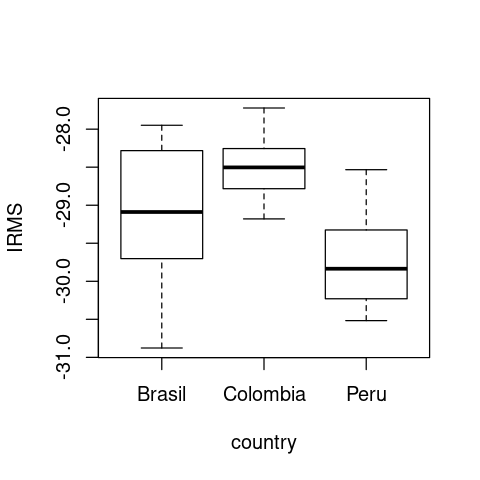

-30.8770,-29.1800,-30.5170
-29.7025,-28.7830,-30.2300
-29.0890,-28.5030,-29.8350
-28.2825,-28.2555,-29.3255
-27.9490,-27.7220,-28.5330
-29.76547,-28.7182,-30.34027
-28.41253,-28.2878,-29.32973
-30.9090,-29.2070,-30.2590
-29.8455,-28.7855,-30.1680
-28.9340,-28.5050,-30.0570
-28.3570,-28.1100,-29.2105


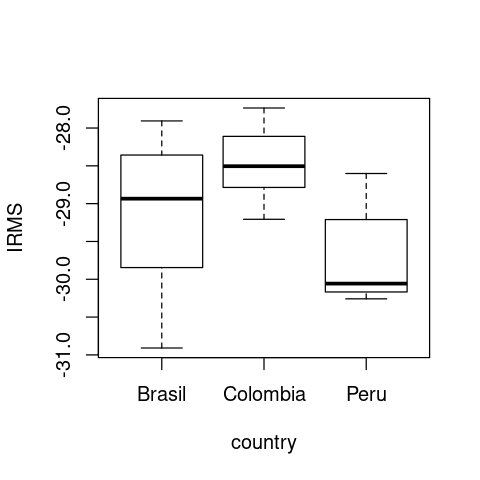

In [241]:
apply(a[c(2,3)], 2, function(x) { 
    boxplot(x, main = names(x) , names = a[[1]], xlab = "country", ylab = "IRMS")
    }
)

The above example is, however, not a very good one since boxplot itself is a very powerful function to aggregate data. The same result is thus optained by the simple call:

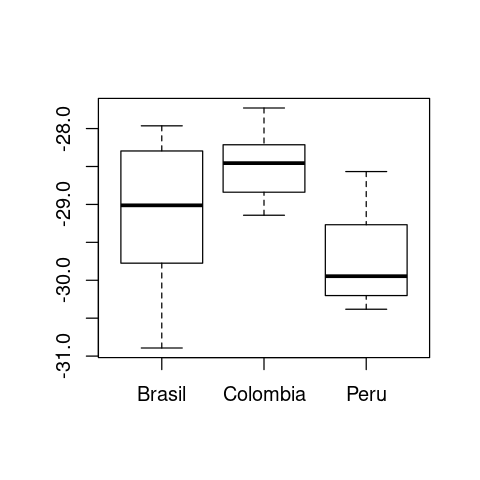

In [224]:
boxplot(mean ~ country, d)